In [1]:
### Policing and Environment Group Assignment Two
# We merged our environmental justice scores data frame with the LA census data for 2012 data frame with the object "FIPS".
# By adding a leading *zero* to our EJSM data, we were able to geographically match the two data frames. 
# The cumulative impact score includes the variables of climate change vulnerability, environmental hazards, social vulnerability, and health scores. 
# We chose to map the hazard, social vulnerability, and cumulative impact scores to demonstrate some of the overlaps between negative environmental outcomes in areas with high scores of social vulnerabilities. 
# Our final maps display the disporportionate distributions of environmental degredation in South, Central, and East Los Angeles. 

In [47]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px

In [2]:
# import LA environmental justice score data 
df = pd.read_csv(
'Data/EJSM_Scores/EJSM_Scores (1).csv' ,
dtype={
    'Tract_1':str
})

In [3]:
# add number zero leading the FIPS code for merging the data with the census tract data
df['Tract_1'] = df['Tract_1'].str.zfill(11)
df.head()

OBJECTID      Tract_1  CIscore  HazScore  HealthScore  SVscore  CCVscore  \
0         1  06037920336       10         3            1        4         2   
1         2  06037920044        4         1            1        1         1   
2         3  06037573003       13         5            3        3         2   
3         4  06037571704       13         3            2        4         4   
4         5  06037570403       17         5            3        5         4   

    Shape__Area  Shape__Length  
0  2.438560e+06    8124.373091  
1  1.470811e+06    5545.298452  
2  6.528168e+05    3310.743793  
3  6.994011e+05    4113.477175  
4  8.317839e+05    3887.000394

In [4]:
# import 2012 census data
tracts=gpd.read_file('Data/CensusData2012/census-tracts-2012.geojson')
print(tracts)

                     kind  external_id         name  \
0     Census Tract (2012)  06037101110  06037101110   
1     Census Tract (2012)  06037101122  06037101122   
2     Census Tract (2012)  06037101210  06037101210   
3     Census Tract (2012)  06037101220  06037101220   
4     Census Tract (2012)  06037101300  06037101300   
...                   ...          ...          ...   
2341  Census Tract (2012)  06037980031  06037980031   
2342  Census Tract (2012)  06037980033  06037980033   
2343  Census Tract (2012)  06037990100  06037990100   
2344  Census Tract (2012)  06037990200  06037990200   
2345  Census Tract (2012)  06037990300  06037990300   

                               slug                                    set  \
0     06037101110-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
1     06037101122-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
2     06037101210-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
3     06037101220-census-tr

In [5]:
# list column names
list(tracts)

['kind',
 'external_id',
 'name',
 'slug',
 'set',
 'metadata',
 'resource_uri',
 'geometry']

In [6]:
# drop columns
columns_to_drop = ['set','kind','resource_uri','metadata']

In [7]:
# read columns 
tracts.head()

kind  external_id         name  \
0  Census Tract (2012)  06037101110  06037101110   
1  Census Tract (2012)  06037101122  06037101122   
2  Census Tract (2012)  06037101210  06037101210   
3  Census Tract (2012)  06037101220  06037101220   
4  Census Tract (2012)  06037101300  06037101300   

                            slug                                    set  \
0  06037101110-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
1  06037101122-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
2  06037101210-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
3  06037101220-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
4  06037101300-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   

                                            metadata  \
0  {'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...   
1  {'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...   
2  {'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...   
3  {'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...   
4  {'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...   

                                   resource_uri  \
0  /1.0/boundary/06037101110-census-tract-2012/   
1  /1.0/boundary/06037101122-census-tract-2012/   
2  /1.0/boundary/06037101210-census-tract-2012/   
3  /1.0/boundary/06037101220-census-tract-2012/   
4  /1.0/boundary/06037101300-census-tract-2012/   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3007...  
1  MULTIPOLYGON (((-118.30333 34.27354, -118.3031...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2859...  
3  MULTIPOLYGON (((-118.28592 34.24896, -118.2859...  
4  MULTIPOLYGON (((-118.27247 34.23253, -118.2719...

In [8]:
# drop columns from tracts data
tracts = tracts.drop(columns_to_drop,axis=1)

In [9]:
tracts.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   external_id  2346 non-null   object  
 1   name         2346 non-null   object  
 2   slug         2346 non-null   object  
 3   geometry     2346 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 73.4+ KB


In [10]:
# isolate the FIPS code and geometry column to match with the EJSM data
tracts = tracts[['name','geometry']]
tracts.head()

name                                           geometry
0  06037101110  MULTIPOLYGON (((-118.30229 34.25870, -118.3007...
1  06037101122  MULTIPOLYGON (((-118.30333 34.27354, -118.3031...
2  06037101210  MULTIPOLYGON (((-118.29945 34.25598, -118.2859...
3  06037101220  MULTIPOLYGON (((-118.28592 34.24896, -118.2859...
4  06037101300  MULTIPOLYGON (((-118.27247 34.23253, -118.2719...

In [11]:
# show columns
tracts.columns = ['FIPS','geometry']
tracts.head()

FIPS                                           geometry
0  06037101110  MULTIPOLYGON (((-118.30229 34.25870, -118.3007...
1  06037101122  MULTIPOLYGON (((-118.30333 34.27354, -118.3031...
2  06037101210  MULTIPOLYGON (((-118.29945 34.25598, -118.2859...
3  06037101220  MULTIPOLYGON (((-118.28592 34.24896, -118.2859...
4  06037101300  MULTIPOLYGON (((-118.27247 34.23253, -118.2719...

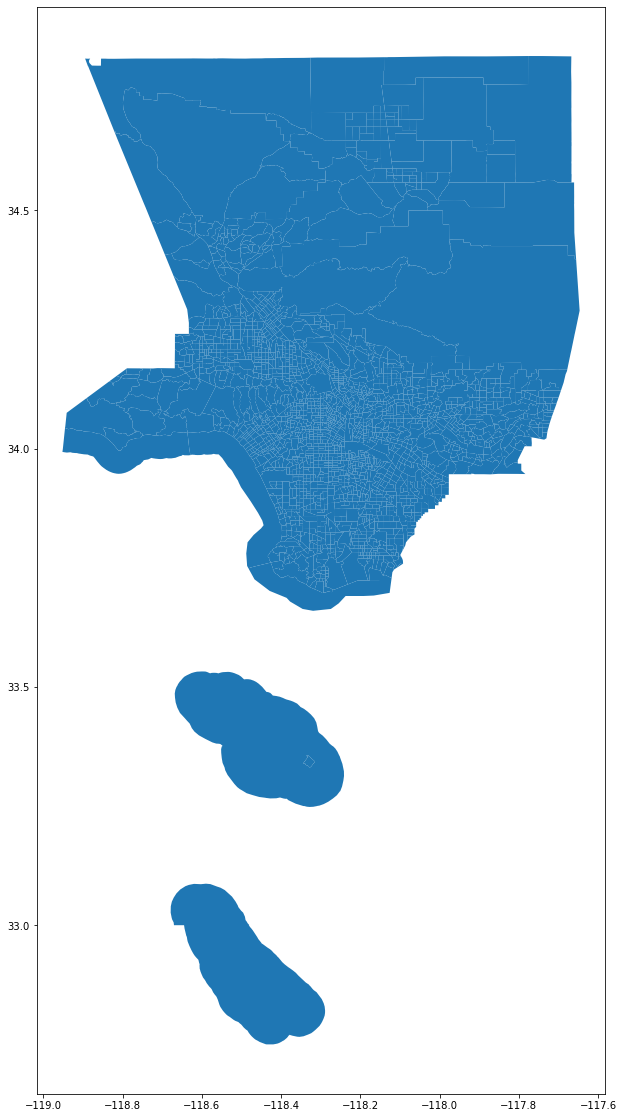

In [12]:
#plot tracts
tracts.plot(figsize=(24,20))

In [13]:
# list EJSM df with new FIPS code
list(df)

['OBJECTID',
 'Tract_1',
 'CIscore',
 'HazScore',
 'HealthScore',
 'SVscore',
 'CCVscore',
 'Shape__Area',
 'Shape__Length']

In [14]:
# show data
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       2343 non-null   int64  
 1   Tract_1        2343 non-null   object 
 2   CIscore        2343 non-null   int64  
 3   HazScore       2343 non-null   int64  
 4   HealthScore    2343 non-null   int64  
 5   SVscore        2343 non-null   int64  
 6   CCVscore       2343 non-null   int64  
 7   Shape__Area    2343 non-null   float64
 8   Shape__Length  2343 non-null   float64
dtypes: float64(2), int64(6), object(1)
memory usage: 164.9+ KB


In [15]:
# rename object Tract_1 to FIPS to match census tract data
df.columns = ['OBJECTID',
 'FIPS',
 'CIscore',
 'HazScore',
 'HealthScore',
 'SVscore',
 'CCVscore',
 'Shape__Area',
 'Shape__Length']
df.head()

OBJECTID         FIPS  CIscore  HazScore  HealthScore  SVscore  CCVscore  \
0         1  06037920336       10         3            1        4         2   
1         2  06037920044        4         1            1        1         1   
2         3  06037573003       13         5            3        3         2   
3         4  06037571704       13         3            2        4         4   
4         5  06037570403       17         5            3        5         4   

    Shape__Area  Shape__Length  
0  2.438560e+06    8124.373091  
1  1.470811e+06    5545.298452  
2  6.528168e+05    3310.743793  
3  6.994011e+05    4113.477175  
4  8.317839e+05    3887.000394

In [16]:
# merge data on the same object FIPS
tracts_ejsm=tracts.merge(df,on="FIPS")

In [17]:
# show merge with census data (only population)
tracts_ejsm.head()

FIPS                                           geometry  OBJECTID  \
0  06037101110  MULTIPOLYGON (((-118.30229 34.25870, -118.3007...      1464   
1  06037101122  MULTIPOLYGON (((-118.30333 34.27354, -118.3031...       672   
2  06037101210  MULTIPOLYGON (((-118.29945 34.25598, -118.2859...      1446   
3  06037101220  MULTIPOLYGON (((-118.28592 34.24896, -118.2859...      1703   
4  06037101300  MULTIPOLYGON (((-118.27247 34.23253, -118.2719...      1579   

   CIscore  HazScore  HealthScore  SVscore  CCVscore   Shape__Area  \
0       10         3            1        3         3  1.677572e+06   
1        4         1            1        1         1  3.891711e+06   
2       14         4            1        4         5  9.516179e+05   
3       12         3            1        4         4  1.026836e+06   
4        5         1            1        1         2  3.781233e+06   

   Shape__Length  
0    5561.283410  
1   11660.850429  
2    4451.778658  
3    4673.869604  
4   10813.184183

In [18]:
# describe stats by cumulative impact score
tracts_ejsm['CIscore'].describe()

count    2342.000000
mean       12.007259
std         4.352322
min         0.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        20.000000
Name: CIscore, dtype: float64

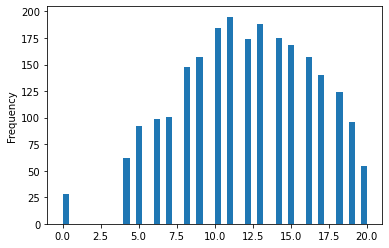

In [65]:
# plot histogram for cumulative impact score
tracts_ejsm['CIscore'].plot.hist(bins=50)

In [66]:
# describe stats by proximity to hazard score
tracts_ejsm['HazScore'].describe()

count    2342.000000
mean        2.976943
std         1.434123
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: HazScore, dtype: float64

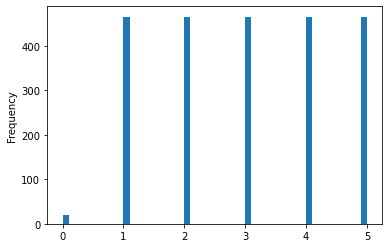

In [67]:
# plot histogram for proximity to hazard score
tracts_ejsm['HazScore'].plot.hist(bins=50)

In [68]:
# describe stats by proximity to hazard score
tracts_ejsm['SVscore'].describe()

count    2342.000000
mean        2.948335
std         1.434122
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: SVscore, dtype: float64

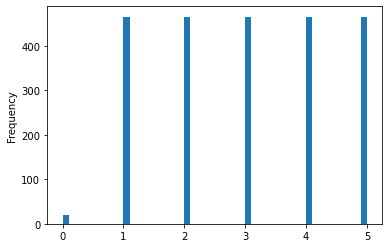

In [69]:
# plot histogram for proximity to hazard score
tracts_ejsm['HazScore'].plot.hist(bins=50)

In [70]:
# new object to show the sorted data- not much deifference. 
tracts_ejsm_sorted = tracts_ejsm.sort_values(by='CIscore',ascending = False)

In [71]:
# sorted data has no variation
tracts_ejsm_sorted[['FIPS','CIscore','HazScore','SVscore']].head(10)

FIPS  CIscore  HazScore  SVscore
1325  06037433501       20         5        5
1530  06037530301       20         5        5
594   06037211922       20         5        5
532   06037206032       20         5        5
533   06037206050       20         5        5
660   06037219300       20         5        5
581   06037211310       20         5        5
672   06037221302       20         5        5
719   06037228900       20         5        5
1637  06037535605       20         5        5

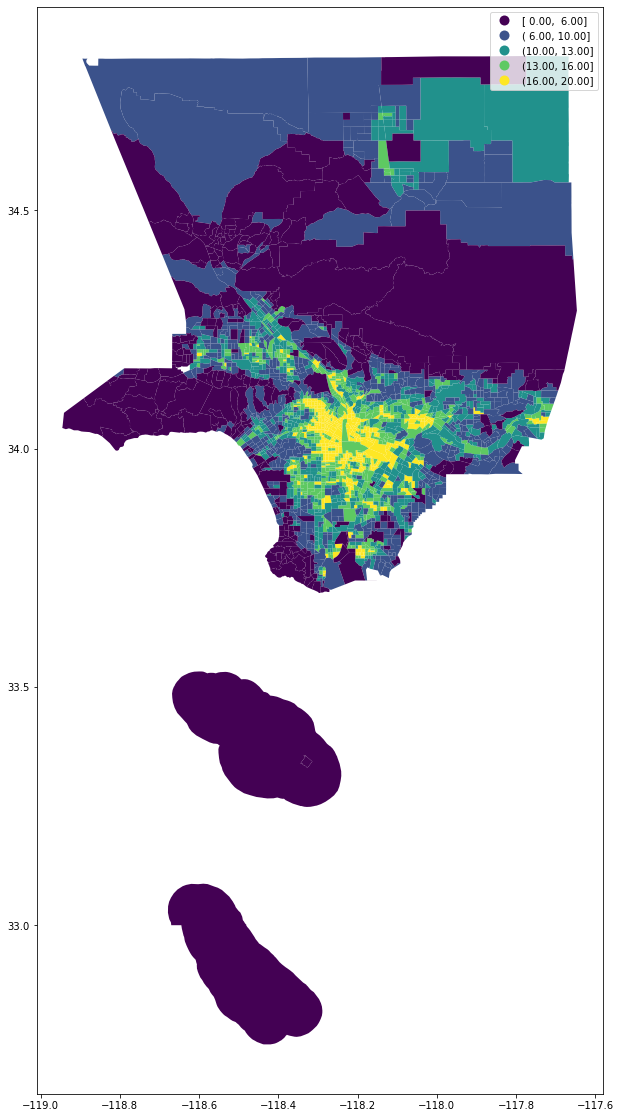

In [72]:
# plot shows the data with natural breaks
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='CIscore',
                 legend=True, 
                 scheme='NaturalBreaks')

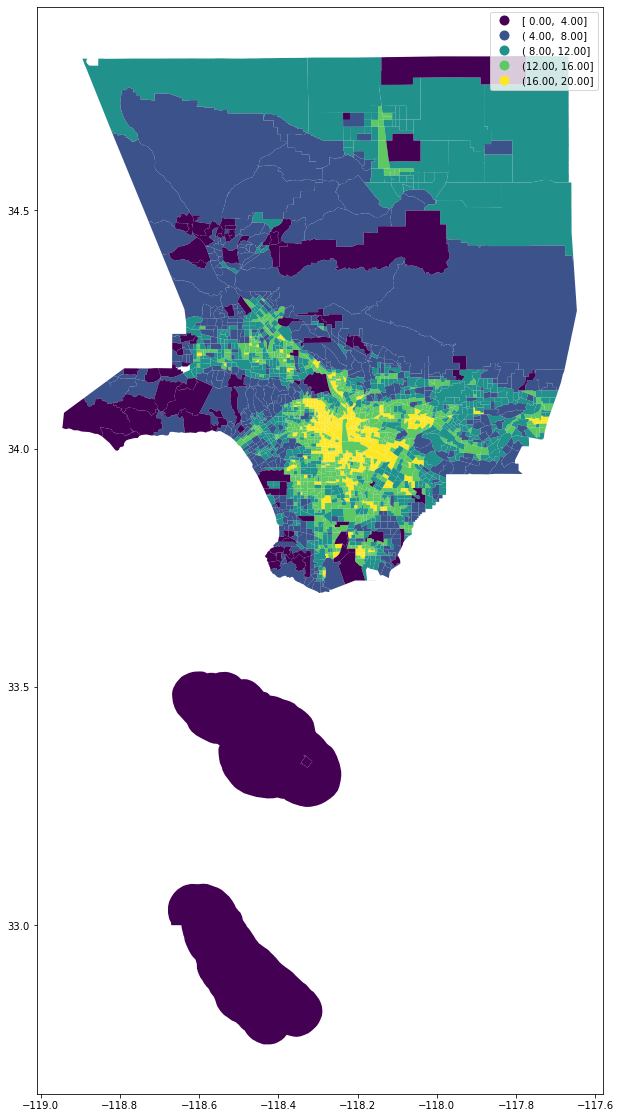

In [73]:
# equal intervalfor Cumulative Impact Score -by standard deviation 
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='CIscore',
                 legend=True, 
                 scheme='equal_interval')

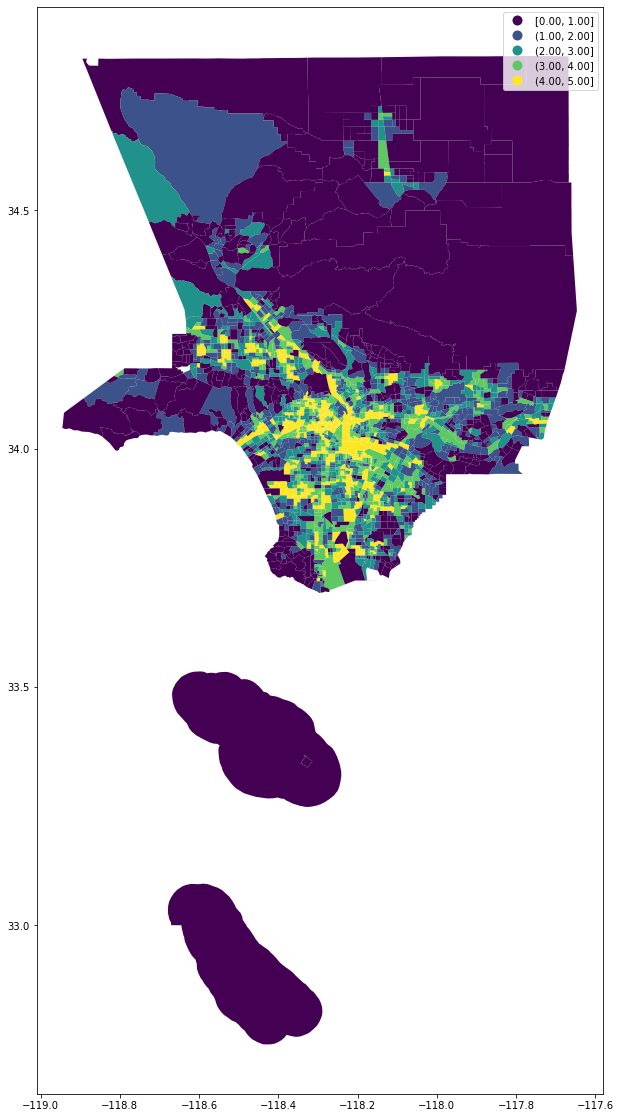

In [74]:
# equal interval for Proximity to Hazard Score -by standard deviation 
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='HazScore',
                 legend=True, 
                 scheme='equal_interval')

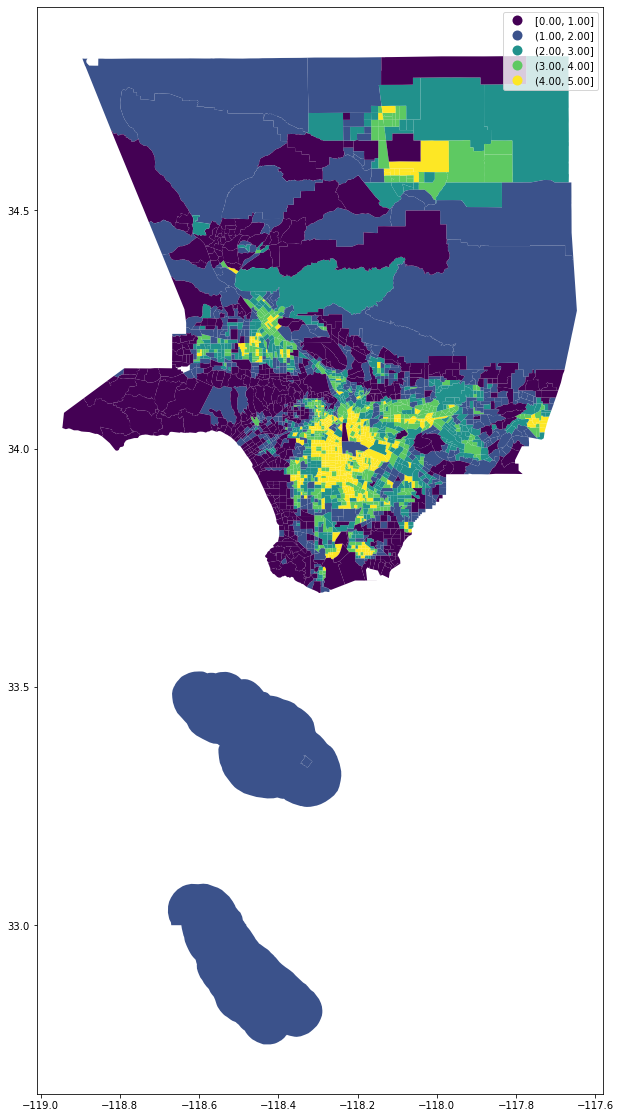

In [75]:
# equal intervalfor Social Vulnerability Score -by standard deviation 
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='SVscore',
                 legend=True, 
                 scheme='equal_interval')

In [19]:
# import
import folium

In [77]:
# This section is an addition for the midterm 

In [20]:
import plotly.express as px
from sodapy import Socrata

In [24]:
client = Socrata("data.lacity.org", None)
results = client.get("amvf-fr72", limit=10000)
df = pd.DataFrame.from_records(results)
df.sample(3)

rpt_id report_type                arst_date  time area    area_desc  \
7023    5969654     BOOKING  2020-07-10T00:00:00.000  2200   17   Devonshire   
3128    5962374     BOOKING  2020-06-28T00:00:00.000  1215   09     Van Nuys   
4566  201513220         RFC  2020-07-24T00:00:00.000  1005   15  N Hollywood   

        rd age sex_cd descent_cd  ... :@computed_region_k96s_3jcv  \
7023  1798  24      M          H  ...                         117   
3128  0926  34      M          H  ...                         235   
4566  1548  30      M          H  ...                         209   

     :@computed_region_tatf_ua23                 bkg_date  \
7023                        1096  2020-07-11T00:00:00.000   
3128                         508  2020-06-28T00:00:00.000   
4566                         410                      NaN   

     :@computed_region_ur2y_g4cx bkg_time :@computed_region_kqwf_mjcx  \
7023                         NaN     0054                           2   
3128                         NaN     1457                           5   
4566                         NaN      NaN                           5   

           bgk_location :@computed_region_2dna_qi2s bkg_loc_cd  \
7023  VALLEY - JAIL DIV                          88       4279   
3128  VALLEY - JAIL DIV                          70       4279   
4566                NaN                          13        NaN   

                       dispo_desc  
7023  MISDEMEANOR COMPLAINT FILED  
3128       FELONY COMPLAINT FILED  
4566  MISDEMEANOR COMPLAINT FILED  

[3 rows x 31 columns]

In [25]:
df.grp_description.unique()

array(['Robbery', nan, 'Liquor Laws', 'Aggravated Assault',
       'Prostitution/Allied', 'Narcotic Drug Laws',
       'Driving Under Influence', 'Gambling', 'Burglary', 'Drunkeness',
       'Vehicle Theft', 'Miscellaneous Other Violations',
       'Other Assaults', 'Against Family/Child', 'Fraud/Embezzlement',
       'Weapon (carry/poss)', 'Moving Traffic Violations',
       'Disorderly Conduct', 'Forgery/Counterfeit', 'Homicide',
       'Receive Stolen Property', 'Non-Criminal Detention', 'Larceny',
       'Rape', 'Sex (except rape/prst)', 'Disturbing the Peace',
       'Pre-Delinquency'], dtype=object)

In [26]:
df.arst_typ_cd.unique()

array(['F', 'M', 'I', 'D', 'O'], dtype=object)

In [27]:
df_subset = df[['arst_date','grp_description','arst_typ_cd','lat','lon']].copy()

In [84]:
arrest_by_charge = df.grp_description.value_counts() 
arrest_by_charge

index  grp_description
0               Aggravated Assault             1567
1   Miscellaneous Other Violations             1383
2          Driving Under Influence              995
3                   Other Assaults              882
4               Narcotic Drug Laws              866
5                    Vehicle Theft              661
6              Weapon (carry/poss)              519
7                         Burglary              452
8                          Robbery              329
9                          Larceny              255
10             Prostitution/Allied              247
11       Moving Traffic Violations              189
12                      Drunkeness              164
13                     Liquor Laws              151
14                        Gambling              111
15            Against Family/Child              101
16         Receive Stolen Property               87
17          Sex (except rape/prst)               86
18              Fraud/Embezzlement               60
19                            Rape               39
20          Non-Criminal Detention               37
21              Disorderly Conduct               36
22             Forgery/Counterfeit               32
23                        Homicide               28
24            Disturbing the Peace                5
25                 Pre-Delinquency                1

In [28]:
arst_typ_cd = df.arst_typ_cd.value_counts().reset_index()
arst_typ_cd

index  arst_typ_cd
0     F         5611
1     M         3704
2     I          519
3     O           84
4     D           82

In [36]:
crime = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

In [ ]:
#### need to map by fips tracts_ejsm = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat)) 

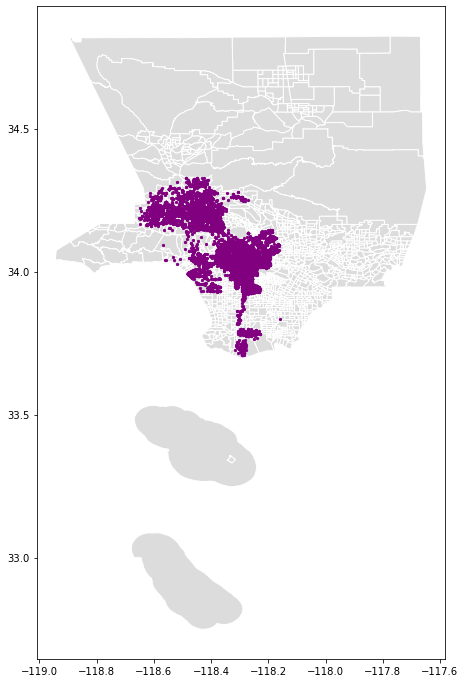

In [37]:
#base map is the tracts_ejsm crime is on top
base = tracts_ejsm.plot(figsize=(12,12),color='gainsboro', edgecolor='white')
ax = crime.plot(ax=base, color='purple', markersize=5)

In [38]:
minx, miny, maxx, maxy = crime.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-118.6536
-118.1589
33.707
34.3274


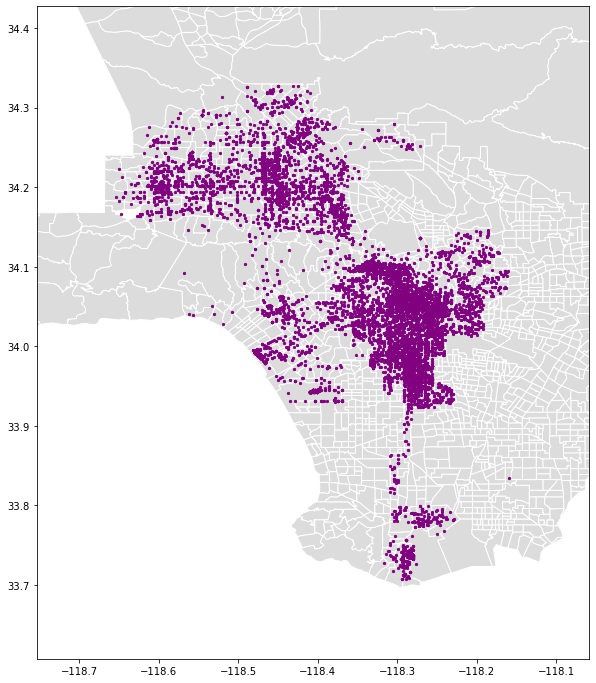

In [33]:
#for zoom

base = tracts_ejsm.plot(figsize=(12,12),color='gainsboro', edgecolor='white')
ax = crime.plot(ax=base, marker='o', color='purple', markersize=5)
ax.set_xlim(minx - .1, maxx + .1)
ax.set_ylim(miny - .1, maxy + .1)
ax

In [ ]:
la_###projects_trimmed = gpd.GeoDataFrame(la_projects_trimmed, 
                                     ##crs="EPSG:4326",
                                    ## geometry=gpd.points_from_xy(la_projects_trimmed.lon, la_projects_trimmed.lat))

In [40]:
crime.set_crs(epsg=4326, inplace=True)
crime.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
tracts_ejsm.crs
tracts_ejsm.head()

FIPS                                           geometry  OBJECTID  \
0  06037101110  MULTIPOLYGON (((-118.30229 34.25870, -118.3007...      1464   
1  06037101122  MULTIPOLYGON (((-118.30333 34.27354, -118.3031...       672   
2  06037101210  MULTIPOLYGON (((-118.29945 34.25598, -118.2859...      1446   
3  06037101220  MULTIPOLYGON (((-118.28592 34.24896, -118.2859...      1703   
4  06037101300  MULTIPOLYGON (((-118.27247 34.23253, -118.2719...      1579   

   CIscore  HazScore  HealthScore  SVscore  CCVscore   Shape__Area  \
0       10         3            1        3         3  1.677572e+06   
1        4         1            1        1         1  3.891711e+06   
2       14         4            1        4         5  9.516179e+05   
3       12         3            1        4         4  1.026836e+06   
4        5         1            1        1         2  3.781233e+06   

   Shape__Length  
0    5561.283410  
1   11660.850429  
2    4451.778658  
3    4673.869604  
4   10813.184183

In [67]:
#join data
join = gpd.sjoin(tracts_ejsm,
                 crime,
                 how='right').reset_index()

In [66]:
join.sample(5)

index  index_left         FIPS  OBJECTID  CIscore  HazScore  \
1540   9809       207.0  06037125310     877.0     16.0       5.0   
5499    300       611.0  06037212702    2038.0     11.0       3.0   
9317   2986       943.0  06037293201    1903.0     11.0       4.0   
3989   7047       483.0  06037199000    1900.0     20.0       5.0   
5425   4445       597.0  06037212202    1385.0     19.0       5.0   

      HealthScore  SVscore  CCVscore   Shape__Area  ...  \
1540          3.0      3.0       5.0  1.542260e+06  ...   
5499          4.0      2.0       2.0  1.283232e+06  ...   
9317          3.0      3.0       1.0  1.558658e+06  ...   
3989          5.0      5.0       5.0  2.280363e+06  ...   
5425          5.0      5.0       4.0  3.040089e+05  ...   

      :@computed_region_tatf_ua23                 bkg_date  \
1540                          279  2020-08-10T00:00:00.000   
5499                         1344  2020-06-23T00:00:00.000   
9317                         1320  2020-07-10T00:00:00.000   
3989                          648  2020-07-07T00:00:00.000   
5425                         1246  2020-02-11T00:00:00.000   

     :@computed_region_ur2y_g4cx bkg_time :@computed_region_kqwf_mjcx  \
1540                         NaN     1302                           5   
5499                         NaN     1337                           7   
9317                         NaN     1920                          15   
3989                         NaN     1204                          11   
5425                         NaN     1020                          12   

               bgk_location :@computed_region_2dna_qi2s bkg_loc_cd  \
1540      VALLEY - JAIL DIV                          13       4279   
5499  METRO - JAIL DIVISION                          86       4273   
9317                77TH ST                          55       4212   
3989                77TH ST                           1       4212   
5425                77TH ST                          63       4212   

                       dispo_desc                     geometry  
1540       FELONY COMPLAINT FILED  POINT (-118.37520 34.17000)  
5499       FELONY COMPLAINT FILED  POINT (-118.32300 34.05470)  
9317  MISDEMEANOR COMPLAINT FILED  POINT (-118.30000 33.83150)  
3989                          NaN  POINT (-118.21630 34.07630)  
5425  MISDEMEANOR COMPLAINT FILED  POINT (-118.29160 34.05590)  

[5 rows x 43 columns]

In [68]:
join.info()

NameError: name 'sjoin' is not defined

In [43]:
#there is a discrepancy in numbers
#list AG 
#06037980028	235
#1	06037273402	130
#2	06037206300	112
#3	06037237600	99
#4	06037190700	86
crime_by_tracts = join.FIPS.value_counts().rename_axis('tract').reset_index(name='crime_count')
crime_by_tracts.head()

tract  crime_count
0  06037980028          235
1  06037273402          130
2  06037206300          112
3  06037237600           99
4  06037190700           86

In [51]:
crime_by_tracts.keys()

Index(['tract', 'crime_count'], dtype='object')

In [54]:
#subset the data
columns_to_keep = df['CIscore', 'HazScore', 'HealthScore', 'SVscore', 'CCVscore', 'arst_date','grp_description','arst_typ_cd','lat','lon','geometry'']
tracts_ejsm_crime = tracts_ejsm_crime[columns_to_keep]
columns_to_keep.sample(10)

SyntaxError: EOL while scanning string literal (<ipython-input-54-b2f994990b4c>, line 2)

In [48]:
#number of arrests in 2020

px.bar(df,
       x='arst_date',
       title='LAPD Arrests by Charge Type in 2020',
       labels={'arst_date':'Arrest date','count':'Number of arrests'}
      )

In [ ]:
where = "grp_description IN ('Aggravated Assault', 'crime_type2'...)"

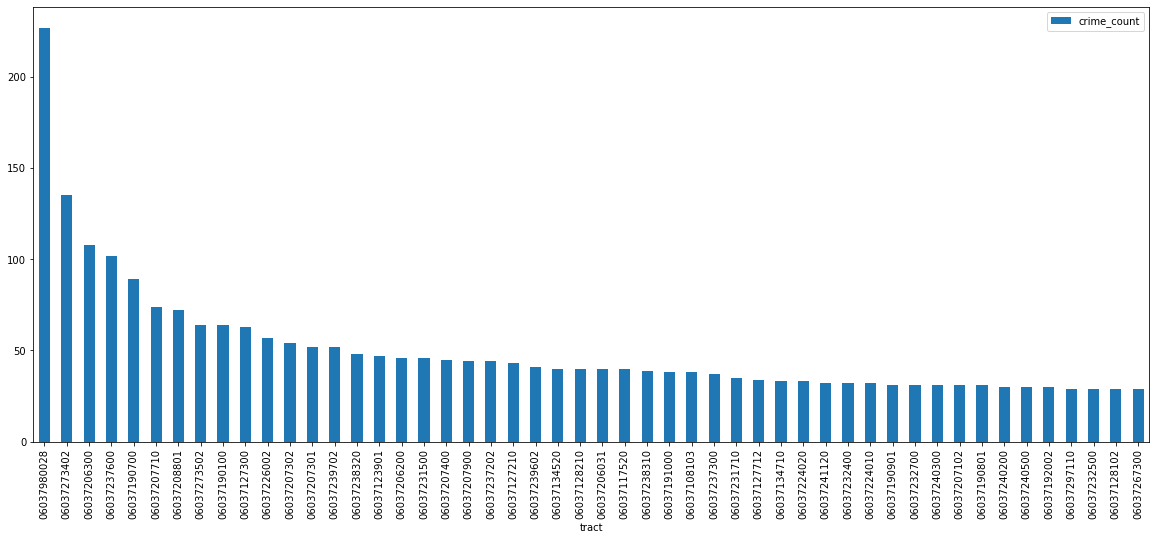

In [97]:
#plot bar
crime_by_tracts[:50].plot.bar(figsize=(20,8),x='tract',y='crime_count')

In [ ]:
crime_subset = df[['arst_date','grp_description','arst_typ_cd','lat','lon']].copy()

In [ ]:
df_subset.head()